# Testing qipQST

## Imports

In [3]:
%load_ext autoreload

%autoreload 2
import qipQST as qst
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('default')

## Check $\pi / 2$ matrices

In [41]:
print(qst.PiO2X().getMatrix())
print(qst.PiO2Y().getMatrix())

[[0.7071+0.j     0.    -0.7072j]
 [0.    -0.7072j 0.7071+0.j    ]]
[[ 0.7071-0.j -0.7072-0.j]
 [ 0.7072-0.j  0.7071-0.j]]


## Idle Gate

In [3]:
tau = 1
idleGate = qst.IdleGate(tau)

def theoryIdleGate(detuning, tau):
    return 0.5 + 0.5 * np.cos(2 * np.pi * detuning * tau)

guessResonances = np.linspace(-4, 4, 1001).tolist()

In [4]:
idleGateSweepGuessProbs = qst.gate_test.sweepGuess(guessResonances, idleGate, startingState="+X", probabilityState="+X")

100%|██████████| 1001/1001 [00:16<00:00, 61.44it/s]


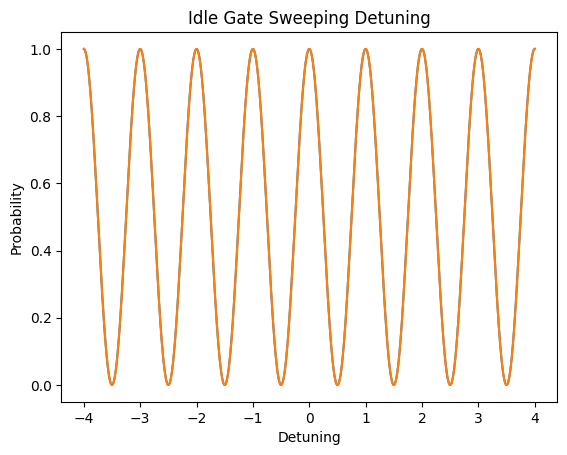

In [5]:
plt.plot(guessResonances, idleGateSweepGuessProbs)
plt.plot(guessResonances, [theoryIdleGate(res, tau) for res in guessResonances])
plt.xlabel("Detuning")
plt.ylabel("Probability")
plt.title("Idle Gate Sweeping Detuning")
plt.show()

## Frequency Modulation Test

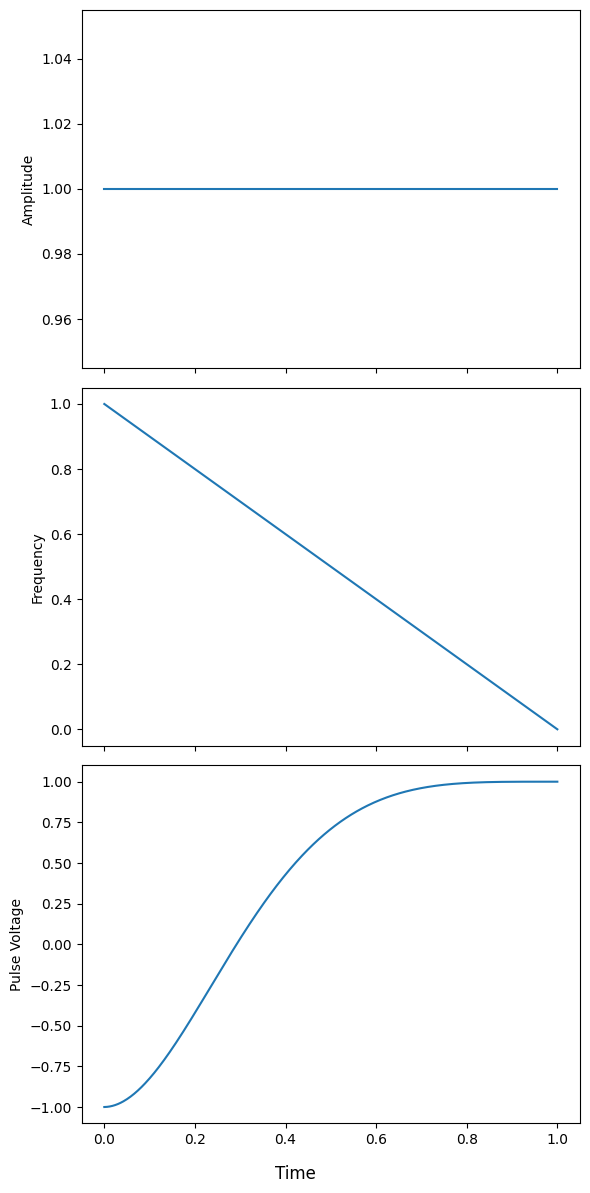

In [45]:
rampGate = qst.QuantumGate()
rampGate.appendPulse(qst.RampPulse(1, (1, 1), (1, 0), (0, 0)))
rampGate.plotPulses()

## Single Ramsey Sequence

In [17]:
tau = 2
guess = 0.2

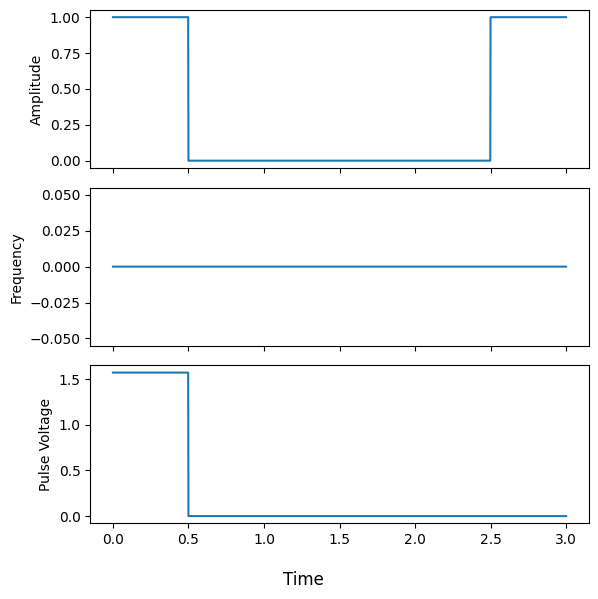

In [18]:
ramseyCircuit = qst.QuantumCircuit(guess)
ramseyCircuit.appendGate(qst.PiO2X())
ramseyCircuit.appendGate(qst.IdleGate(tau))
ramseyCircuit.appendGate(qst.PiO2Y())
ramseyCircuit.plotCircuitWaveform()

In [19]:
testSimulator = qst.PulseSimulator()
testSimulator.setQubit(qst.Qubit(0))
testSimulator.setCircuit(ramseyCircuit)
testSimulator.setTimeSteps(1, 10000)

In [20]:
testResult = testSimulator.simulateCircuit(1, 10000)

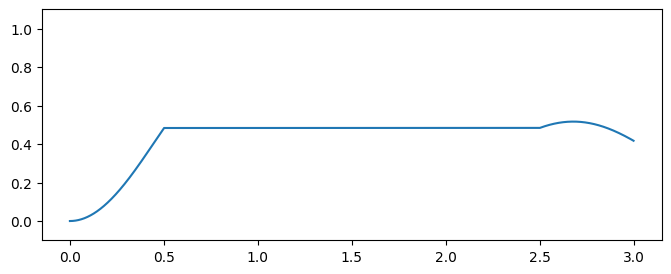

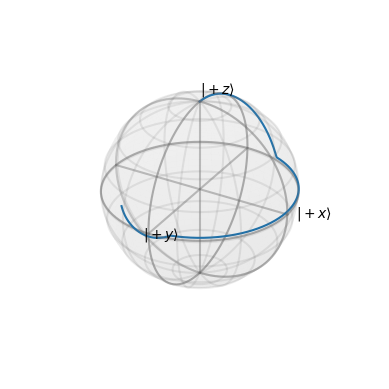

In [21]:
#%matplotlib qt
#testResult.plotBloch()
%matplotlib inline
testResult.plotProbability("-Z")
testResult.plotBloch()

# Rabi

## Cycle

In [ ]:
time = 1 / 2
numIterations = 100
#times = np.linspace(0, time, numIterations)

amplitude = 1
larmor = 0
larmors = [0, 0.5, 1]
pulseFrequency = 0

detuning = pulseFrequency - larmor

def idealRabi(t):
    return ((((amplitude * np.pi)**2) / ((detuning * np.pi * 2)**2 + (amplitude * np.pi)**2)) * 
            np.sin(np.sqrt((amplitude * np.pi)**2 + (detuning * np.pi * 2)**2) * t / 2)**2)

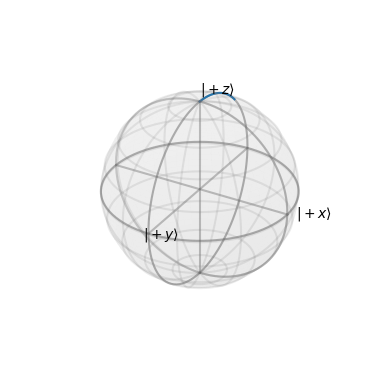

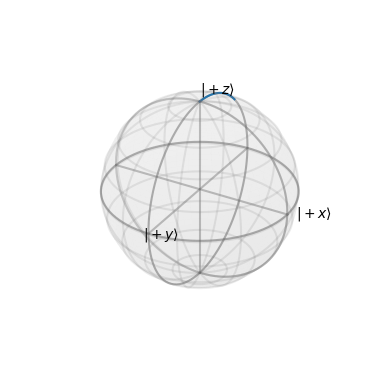

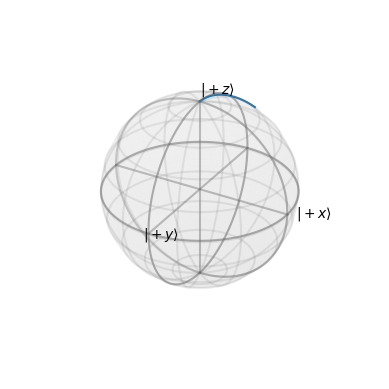

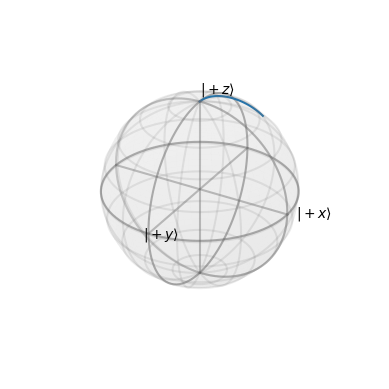

In [9]:
times, rabiCycleProbs = qst.rabi.rabiCycle(larmor, time, amplitude, pulseFrequency, numIterations)

cycles = [qst.rabi.rabiCycle(l, time, amplitude, pulseFrequency, numIterations) for l in larmors]

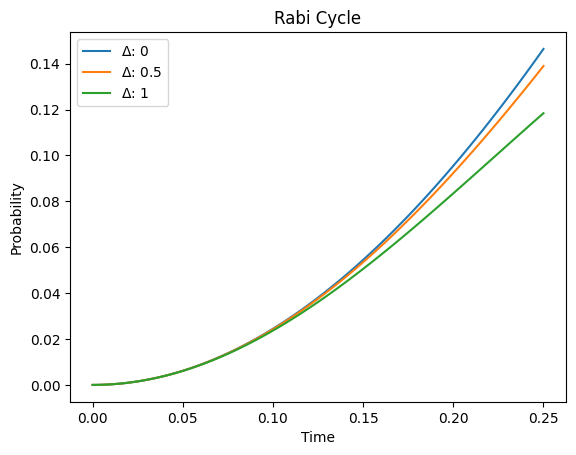

In [10]:
for i in range(3):
    plt.plot(cycles[i][0], cycles[i][1], label="$\\Delta$: {}".format(larmors[i]))

plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Rabi Cycle")
plt.legend()
plt.show()


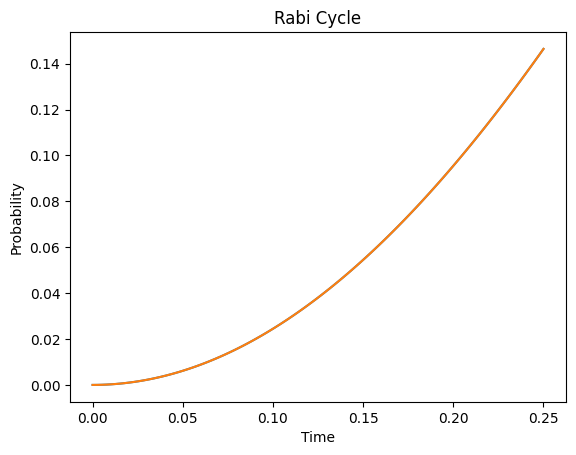

In [11]:
plt.plot(times, rabiCycleProbs)
plt.plot(times, idealRabi(times))
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Rabi Cycle")
plt.show()

## Sweep Guess

In [92]:
time = np.pi / 2
amplitude = 1

def theoryDetunedPulse(detuning, amplitude, time):
    amplitude *= np.pi
    detuning *= np.pi * 2
    omegaTilde = np.sqrt(detuning**2 + amplitude**2)
    A = omegaTilde * time
    return (amplitude**2 / omegaTilde**2) * np.sin(A / 2)**2

In [93]:
guessResonances = np.linspace(-4, 4, 201).tolist()

In [94]:
rabiSweepGuessProbs = qst.rabi.sweepGuess(guessResonances, time, amplitude=amplitude)

  0%|          | 0/201 [00:00<?, ?it/s]

100%|██████████| 201/201 [00:15<00:00, 12.98it/s]


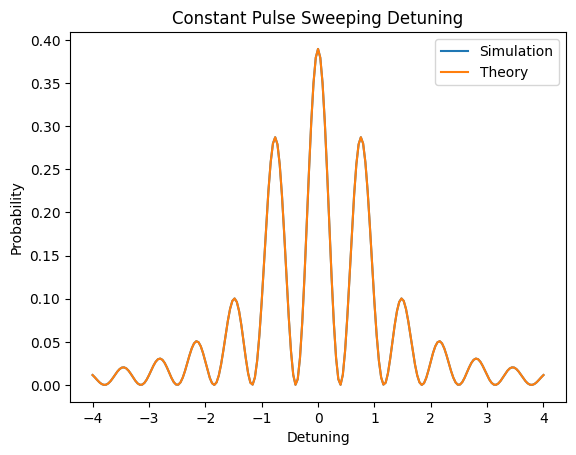

In [95]:
plt.plot(guessResonances, rabiSweepGuessProbs, label="Simulation")
plt.plot(guessResonances, [theoryDetunedPulse(res, amplitude, time) for res in guessResonances], label="Theory")
plt.xlabel("Detuning")
plt.ylabel("Probability")
plt.title("Constant Pulse Sweeping Detuning")
plt.legend()
plt.show()

# Ramsey

## Sweep Guess

In [ ]:
guessResonances = np.linspace(-0.5, 0.5, 101).tolist()

In [ ]:
guessResults = qst.ramsey.sweepGuess(guessResonances, 1.5, 100, "Y")

100%|██████████| 101/101 [00:00<00:00, 300.66it/s]


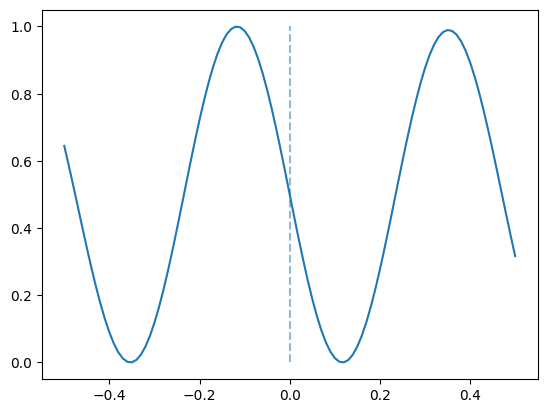

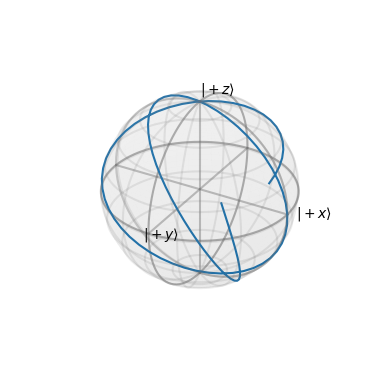

In [ ]:
plt.plot(guessResonances, [result.getProb() for result in guessResults])
plt.vlines([0], 0, 1, linestyles="--", alpha=0.5)
plt.show()

qst.plotBloch([result.getState() for result in guessResults])

## Sweep Tau

In [ ]:
taus = np.linspace(0, 10, 101).tolist()

In [ ]:
tauResults = qst.ramsey.sweepTau(taus, 0.1)

100%|██████████| 101/101 [00:02<00:00, 40.86it/s]


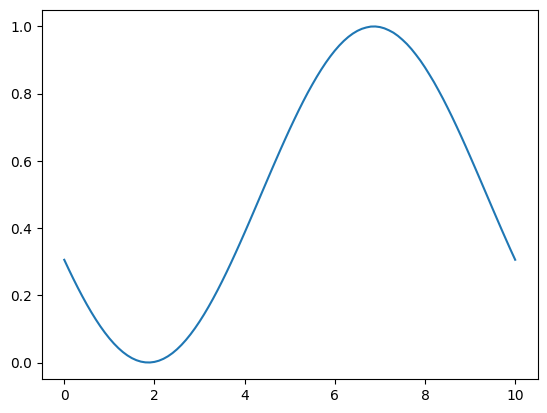

In [ ]:
plt.plot(taus, tauResults)
plt.show()

## Sweep Both

In [105]:
guessResonances = np.linspace(-2, 2, 101).tolist()
taus = np.linspace(0, 2, 101).tolist()

In [106]:
bothResultsX = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100)
bothResultsY = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100, secondGate="Y")

100%|██████████| 101/101 [01:04<00:00,  1.57it/s]


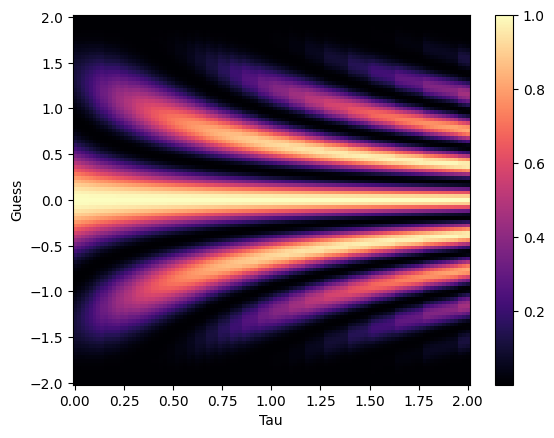

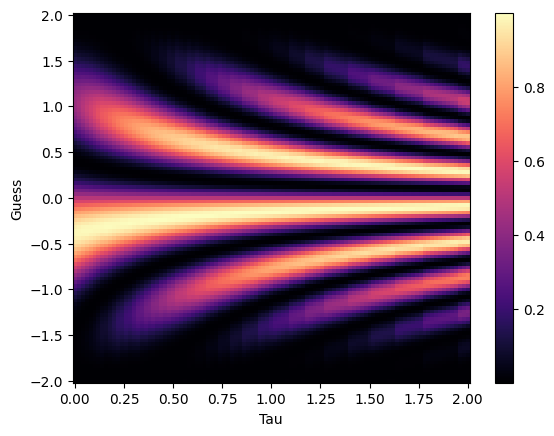

In [107]:
X, Y = np.meshgrid(taus, guessResonances)
pcolorm = plt.pcolormesh(X, Y, bothResultsX, shading="nearest", cmap="magma")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()

pcolorm = plt.pcolormesh(X, Y, bothResultsY, shading="nearest", cmap="magma")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()